# Lesson Introduction: GP From Fundamentals
Building a GP one piece at a time

In [40]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc.sampling_jax
import scipy.stats as stats

plt.style.use('intuitivebayes.mplstyle')
figsize = (14,7)  

In [21]:
# Start with simulated sine wave 
np.random.seed(1)
x = np.linspace(-4,4, 20)
noise = stats.norm(0, .1).rvs(x.shape)
y = np.sin(x) + noise

# Fitting and predicting a point

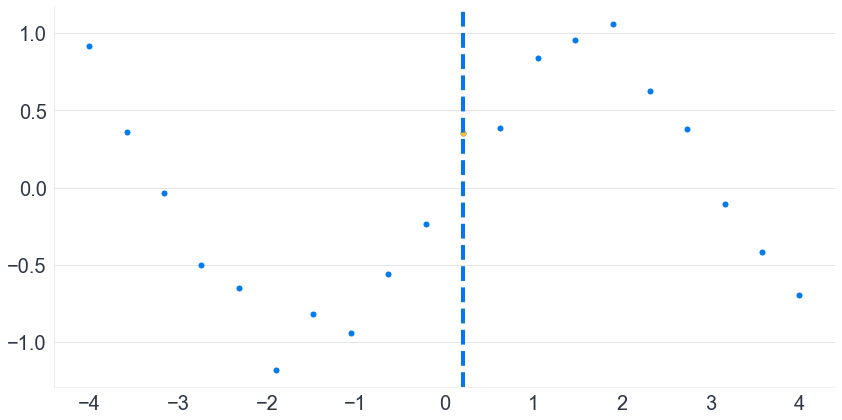

In [76]:
figsize = (14,7)  
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(x,y)

index = 10
ax.axvline(x[index], linestyle='--')
ax.scatter(x[index],y[index]);

In this lesson we're going to make a prediction at a specific x value of interest, x prime as its typically called, just like we did in the last lesson

But now were going to do two things differently

## Our GP

In [62]:
X = x[:,None]

x_prediction = .2
with pm.Model() as latent_gp_model:
    # Specify the covariance function.
    cov_func = pm.gp.cov.ExpQuad(1, ls=0.1)

    # Specify the GP.  The default mean function is `Zero`.
    gp = pm.gp.Latent(cov_func=cov_func)
    
    # Place a GP prior over the function f.
    f = gp.prior("f", X=X)
    
    # TODO: Can we change these car names to be more intuitive
    f_star = gp.conditional("f_star", np.array([[.2]]))
    trace = pm.sample(1000, chains=2, return_inferencedata=True)
    
    pred_samples = pm.sample_posterior_predictive(trace.posterior, var_names=["f_star"])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [f_rotated_, f_star]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 13 seconds.


One, We're going to do it using a GP. And 2 were going to show you exactly how we're going to do it in great detail. Even more detail than you're seeing here

In [80]:
pred_samples.posterior_predictive.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:       (chain: 2, draw: 1000, f_star_dim_0: 1)
Coordinates:
  * chain         (chain) int64 0 1
  * draw          (draw) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * f_star_dim_0  (f_star_dim_0) int64 0
Data variables:
    f_star        (chain, draw, f_star_dim_0) float64 -1.649 -0.3942 ... 0.209
Attributes:
    created_at:                 2022-08-16T02:59:57.281950
    arviz_version:              0.12.1
    inference_library:          pymc
    inference_library_version:  4.0.1>

## Section 10: Multivariate normals
* The distribution that underlies it all
* How covariance

## Section 20: ?

## Section 30: ?

## Section 40: 

# Section 10: Multivariate normals




## Section Recap
* Normal or Gaussian Distributions 
* Covariance is the relationship between the value on one dimension with another

# Section 20: 

## Section Recap

# Section 30: